In [1]:

import tagui as r
r.init()
r.url('https://www.baidu.com')
r.type('q', 'decentralization[enter]')
#print(r.read('result-stats'))
r.snap('page', 'results001.png')
r.close()

True

In [11]:
logo1="""
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                                                                                                            ┃
┃ 发票自动验真系统 1.0   作者:kingboy                                                                        ┃
┃ PYTHON 得到光标处的句柄,控件标题,控件窗口大小,进程名称及ID                                                 ┃
┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛

┌┍┎┏┐┑┒┓└┕┖┗┘┙┚┛┕└┖
"""

import tagui as r

import matplotlib.pyplot as plt
import numpy as np
import cv2

import pytesseract

import base64
from PIL import Image
from io import BytesIO
r.init()
r.url('https://inv-veri.chinatax.gov.cn/index.html')
r.wait(5)
r.type('fpdm', '051002000511')  #发票代码
r.type('fphm', '68353954')      #发票号码
r.type('kprq', '20210519')      #开票日期
r.type('kjje', '875756')        #后六位校验码,最开始显示金额? 是不是在变化?
#print(r.read('result-stats'))
r.snap('page', 'results001.png')


image = Image.open('new01.jpg')

def get_org_pic():
    yzm = (r.read('/html/body/div[1]/div[2]/table/tbody/tr[6]/td[2]/div/a/img[1]/@src').split(',')[-1]) #yzm为base64数据图片
    image = Image.open(BytesIO(base64.b64decode(yzm)))
    image.save('new01.png')
    src1 = cv2.imread(('new01.png'))
    cv2.imshow('org',src1)
    r1, g, b = image.split()     # 将图片分割成 红绿蓝 三个
    r1.show()
    g.show()
    b.show() 
    im_cv2 =  cv2.cvtColor(src1, cv2.COLOR_BGR2HSV) 
    return im_cv2


yzminfo = ((r.read('//td[@id="yzminfo"]')))
img_cv2 = get_org_pic()

result = pytesseract.image_to_string (image,lang='eng')
print('识别结果',result)

#print(img_cv2)
# 创建RGB色彩空间


def get_yzm_pic(yzminfo_):
    tmp_img_cv2 = get_org_pic()
    if yzminfo_ == '请输入验证码图片中红色文字' :
        print('红色')
        lower_hsv = np.array([-6, 43, 46])  #红
        upper_hsv = np.array([10, 255, 255])
        img_dst1 = cv2.inRange(tmp_img_cv2,lower_hsv,upper_hsv)
    elif yzminfo_ == '请输入验证码图片中蓝色文字' :
        print('蓝色')
        lower_hsv = np.array([110, 43, 46])  #蓝
        upper_hsv = np.array([148, 255, 255]) 
        img_dst1 = cv2.inRange(tmp_img_cv2,lower_hsv,upper_hsv)
    else:
        img_dst1 = img_cv2
        print('全部')
    cv2.imwrite('get011.png', img_dst1, [int(cv2.IMWRITE_JPEG_QUALITY),95])
    #img_dst1.save('get01.png')
    return img_dst1

    
#    lower_hsv = np.array([35, 43, 46])  #绿
#    upper_hsv = np.array([77, 255, 255])    


# 对图片进行阀值化处理
#img_dst1 = cv2.inRange(img_cv2,lower_hsv,upper_hsv)
#img_dst2 = cv2.inRange(img_cv2,color_Low2,color_High)
#对结果进行打印
#print(img_dst1,'\n', img_dst2)

img_rt = get_yzm_pic(yzminfo)

#对图像进行展示
cv2.imshow("origin_img",img_cv2)
cv2.imshow("dst_img1",img_rt)
#cv2.imshow("dst_img2",img_dst2)
cv2.waitKey(0)
cv2.destroyAllWindows()

#r.wait(175)
#r.close()



识别结果 
红色


In [14]:
#重新点击获取验证码照片
print ((r.read('//td[@id="yzminfo"]')))
r.click('/html/body/div[1]/div[2]/table/tbody/tr[6]/td[2]/div/a/img[1]')
r.wait(3)
r.hover('/html/body/div[1]/div[2]/table/tbody/tr[6]/td[2]/div/a/img[1]')
r.wait(1)
yzminfo = ((r.read('//td[@id="yzminfo"]')))



print(yzminfo)
img_rt = get_yzm_pic(yzminfo)
print(yzminfo)
#对图像进行展示
#cv2.imshow("origin_img",img_cv2)
cv2.imshow("dst_img1",img_rt)
#cv2.imshow("dst_img2",img_dst2)
cv2.waitKey(0)
cv2.destroyAllWindows()

请输入验证码文字
请输入验证码图片中蓝色文字
蓝色
请输入验证码图片中蓝色文字


In [25]:

lower_hsv = np.array([100, 43, 46])  #蓝
upper_hsv = np.array([124, 255, 255]) 
img_dst1 = cv2.inRange(img_cv2,lower_hsv,upper_hsv)
#cv2.imshow("dst_img1",img_dst1)
#dst = cv2.bitwise_and(img_cv2, img_cv2, mask=img_dst1)
cv2.imshow("mask", img_dst1)

#cv2.imshow("dst_img2",img_dst2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
import pytesseract

import base64
from PIL import Image
from io import BytesIO
image = Image.open(BytesIO(
base64.b64decode(r'iVBORw0KGgoAAAANSUhEUgAAAHgAAAAyCAIAAAAYxYiPAAAOQklEQVR42uVcCXRURRbtbJCQkHRCFkKEEAkiawgge1izyKosapBFTITELLJEIhCOOijqHD3iQRFUhDgooiyCOkRgPMwAI46KKzqSgQFlcSEhZOts3c3c6veprq7f3fSWGJ1z/snp/l3/V9Wt++67r353NLWnztJRdvr7Tk0d/3vmU37GzjFwTYKtj26ZGmTnwuXhxxy5vwePtKh/tGR3EwI7Wz2vEd/kXcnIr8h0p5sj60PpxaUDq1rtsSb/DqfaBw8vVZ8sypvn4OWDxq3DXwugQedQg9YWqWdNmuYI1i7Pf/o/e7bm5XHz0EgwuUPqZhriB6d0rQqySakZHgDaPqlbGGI3D++MiNbLaKdI7WAf024a1nwT2BF8u62P3k5JdeGGo7+9qYWAdoTU171vTv8Y9wf39nM1Vs+H3fqm1fOb91ymF0vGz7TaYPLP+lbEaKukPpP5HwchPvXKNvz98q3Nv7t8lVi9yLULN656yUWgrZL6D2wJXD7O/225W4yWSE1NKzYuLHvvoVYyw5d++vN12+juGt7Y64aGQd0aRvTA38ubc+w0/iguumFIfPk2R0l94OOM9Av9ouqDHMTaJtCM1I0B3/59MbUrf2uJoUN73e23NCbEVq2Y1vq5Vr41Xx+l5W8NkSFXNZrGAXH8zMC0RLF92e4H9bEROE6PSyzbW2iHws+fmNK/MjpWF/royeTSQwVOM3re8ouSRGT9MHj21xMVOm9YUJ/YRflofxEGXVU0vZVg+t3gm9UnEXzGgDb8bcXzGRgzjtr5Y6zepCY79crae/Cics2sq77eNTlpUoPPjuTmnh3aoaFdyqX4Nz9P/+VgkevJUPoMdAapk871xuumHp1oHHQY/XwwaLDA6k3L3l9+ad8KW132nv9Rc8A9fo2PdMbY1tc8jH0rCGj9DR2sXg7Ks2GbXlcvnmgM8qfXAHTb5+nJl+IBcd6ZYceP5NH5CON2p4G28zFInX12CI2jfPtifh5rziIxIdYiWrctQmwa/f1AJQzUENKuJmOsJ9Vgx9L68X2b4iIxGNzcGNgWb6U2EOLLr2SvT9+Nv4bw9qLmQvowZlxrlf7nvKL5W31MGFqWluQ/Ujq+i06bWNnp+RNTHc971wH6r03Z6o+J1PiLjkXCEjswZ+VkyUqAbtAGVq2aISZMBCwQh+RV7CpdmjDD2cG9G5wnvtVHhxrCgoAvlLR66WRwE2PAC3N3GxfiUwAKdUYbRoX+XfmnTd2jGdAh7dQdXXlmbu2cJP72k6He9xRrtA1t0y8kHDsacv3EeDTDXUYTqe8/OQCjNzNr+2ICumrZVDb/UY+zCS+eKF5Vl9Z/9K7VXNA9YlcQRlwKdmjz4ChoGDx3YV1BZDOFgwPErkECvGV6oroz1gyTUhJdeeSNpzVPP6g5/dr86w4p6aknPSMdROpONYFVfTuaw/PlLGWGOwsgDle9vZDiFWo8eXdTfMe6SYnwJ9Dxy8XMUdUsSObTG24st+oQKtZnMoxKVtoaBvoCW8UzTTdG0TCoF9b7s/P4SBh84cH4lMsX+E7t0QtUCAwwF1l92tz3wQJKdDtfHGDwZs1EqfRMZUivHtmh6MDZgINSo8phXRFc/C2EmFEjyP9EYRGXPOgJXjf26VxdMIVNLysF0JDglO1ZhhdqPWVrkJUCTceFUCHEu4iLLL6v5Yp2jZSEgBvmk8kHxhDkjI5gQPOrsAbUHp1CQNiQBnRFoks5HxtR4cMTHQk0WOL5Evy6jQzhwfDRZtx9gil914YFc7qxM9GhLMC9NPrO4UThysfToYzMAPj7URSfL1jC/SJT2y7h4p2xWlgq3fQhVoB+OQuNpVERcKm5CtBNPWNEjaLsx+OABklH6YFFSHRdz/kmHvfa9GTMT69nS4bKnH7UR8nKyj/dKQaEQ0Df9ixTomlxt9hstL9IXF5YOmW4Pt5I8Ydn9WJ+KDdNOenlVZs+nFQPA6q9eySZWSQxkAhgkXn4MbID5l/56B0EFrJo+RsPiD6sarm8Jwf9/aV7ePbWUWqguXRATPj8O7wQiK4Z0O3MgkPtyzNGoqJDovvwHZNq+/up0w8NVV7sV7Kx2Hy1JKELOznXLUazmI0JM094wwLqxtjWTx8RDAQVEcgcZx7B/iIWBNsWMRBNWRTxC0KhJq4qvI0F74JkVheQsY3SNvbtIq4laYhEmYrn5oOwVhltAbRl8mQDCA00X2IyLeY9ClOiRjoxB+vDM5UpqEBgy+brXXvPaOCrEMvby5PSUZeagPtKAk02Ax0DOOIsGIdwU9bAzweFFhGKTb5kJdQA9K98goELyYZc8FWhMgHg8r0IFEdqsUZFB5shlRgS0N/36SoGIn1qiDL7M+RqiYYNQ+ItdN9EWFhDdcEl+ULF4HaPdg7og/t62xToDu0tUnlsBGKNXBSgaerGUj8CX2GBKfABbn1KPxoK5AxExvTgRipeyCCqUnpEM0ZnU9VTnX8rjIeylgmxYhJTIiZjLAH9aGJbKRlySyeKODf7hvYBVudV+C8lOc8IeUQSaOR5/G0YbvEEgCWAneadDUxHESIuem4xumSlJEZi7mIALZpI+gDzxJM7inVlkiHtcB41BUt9pqIWC1A/rg8j19NziN31o3rWTUhEA76cUBIxiZmlo0cni5l38qVerjw1e9erL2CNRemgtWQL1lGrnheSh3rTA2UBXdIwtDvJF3Ou1+Z7+dX7qW7geq00HtHDCaC3TFXqorDOAZLDNfp52d8kYzJn6RMwPoVrW3JRudC2A0wuDzqqjGty0pAGu508x6pqbaBcwl1Tf54bJAkmuefxi5FAYfecKJHMHMoWtSVXl4i1Y2KUhYkIEUEXa0uLIDNRkOi/SXOvHYj6HHnfHqPvev0dWkbEiPVtI3qxtxD8BQc5o7HCil3NTWM5cG8hY/EYszRd2DCQ15l1UwcBpnWRK0SbQbW1xBQIsSQmnLNkHKVIr1oxjX+KsYmBSDmA4sl8Mi6SPKhu5lDp5qKCi8FNjlu6j4vSAStG9kvcNSfDgDWQc8W+FTDO1DeIjEytjFXIzocnFJNh4CU74lTakyQ7Ifb41aaHYSv5jhodo746VDt3lNKFr3fFunvVqRJ/0QbeHOUSYMISiv5MvKQ+ua8Sha/l8hnxNGMu8YVZc4si1v2uuw6gDL7AAwERQMlqbrq7JdBYamKE6PbJ4fFdEVHo1T7UTNW9hax4iwzBgSTJN2OZ4VVdAiqo0xHvl7Z24ZSQwysfuwtCD/POx08GCeHF+tIGSvzVTRvMDSiPY4s8cW3rVbIuLgINS8T2y+eOwuj5IlvNtvqukUQui/L9ml+GMv4waac4DSnYRW/DJwY2oVNMFWyqmzIQClM8sh8+WjXD3nYwGU2xusPl4DVkij1GMW0hxfmHMgSxcibDXvZuoWR1Vu560TxZk/JkdpkjlhTc8iMEPVOCg1MIPd4r5TpJmHgUS5vUTIinDFS7CGKoWIDBPCBnYgHUzxPIxlwZwHQJPFr9w0E7o4UQSdy8WLTGakvlYYpvINtDN4VjTXYK/3TZrGOK94ASThygKMyY3uLwsHhSbekW0OIeUHXBFFpJxBosmrgDyYg/a0TtnCTYNbX+sE2cMRZuHRIpyS5yIxcfkeC8wKmdnSRxSjogNQoHHd57A3BoPKhgddWSyeTEzxSv5Z5SKrhhfnh9xBngyA6UxrXvEbDo25qPCgII8uTLLRqsMStS+ORz0+qTboabVucNqIe4405VMvKk7o5hbAs/LAjCSmUhN3wQE5gcdaLHYqCmILfHTZFTB9U4UhrgaokKmWo0zoCb63PAFVsPEzwDNIoOYEQyTZ1JjxARU2xbwLQHwrLogVXnHhoneYm2l/IVWy3sbSITcncMMcF9qFqzeLawvwhK9aN/IIgP9wkaMji8vbD8cop25JsLGRfErVd4CbVq8XhlcAsrAY/AlN1ukLkFNLGMSVuQP9hKj5S2jIyX9ovhhekJP9XoVlGoKpouPcdD+KNyg4BCoNAF5saqbas7OKYtfHDZESfryFGxPlMqlKiMNGNtYo+UdasfmNCMQPNKFJ1BW23tk+DAOOybTbBSnkDPGPo6A6IEuAPxmuzUSx7dibd1GAPaqL9qA11mj29URotS6K+DD3sS6M1bRrqyEsU50Bn737mBT+cWSixw1YbPoVBz77cRDY8/YceuXQz9WaS/+snR+MMDPcDossmHPc6gAt0n9FUKcbsDnILVkzxJMyGrPowhIfXFW6Wvu9z3jIr7Qf5XvdmDpL1ZSZ5k9NgvunkW4qImi438Bm0vtlm6cSGITBHAQthG9Yhhv5N0qJl+8KM7cuyqr6/97ytTZhLTuCtA/zozr+W/2UXuivEahX52KqvrVM/lXEDt/IYx9hsE75+rPln/+ptXfXzqdu2xsgzHvzL06g2H49R3KDQe/D7uw3O1TrWf/NghGes9y5BXkfcbBinRszQ+0yl8e6477CadF2lK6UXdnvegIfohQ3Uff1Z78pTuyxN1+z80dL/JGBlV//Krzn6b2QLoT79h01v9zcLmo+0m3a4WS2t2jk8m7LN4++B58e1x/WlRRup27NYnp6xtk1X33j7dZ1+49isIDzD6fEyU+uTaN+50554t/KNPDx4tIR1fp+W4eYffBJrK/HxnL/n39Dhn4da0kt9MtE56piTf4CmC//ZANytSY7PeaiV6ogDdr8eW5gDxyLa/2HMdQeaf589ZOvT3q8vi8c3uizZ/dG8VhXO9E63/jmHEWjfR356jbZk5Bz33QOtZAHvScXRe3h9Di4uOZTd3F/NOVbgO9JnKreLbqNl1zGXrR7sJ8bzv9tKL/C+nSqMZsbzxjyEgzgFt83Htsur/E1Ps5jFruvLfS8ZGHP0fZ/fVXsloNjYAAAAASUVORK5CYII=')))
#image.show()


import matplotlib.pyplot as plt
import numpy as np
import cv2
# 对图片进行读取
image.save('new01.jpg')
 
#image = Image.open('new01.jpg')
result = pytesseract.image_to_string (image,lang='eng')
print(result)

img_cv2 = cv2.imread(('new01.jpg'))
#print(img_cv2)
# 创建RGB色彩空间
color_Low1 = np.array([30,27,237])
color_Low2 = np.array([1,1,1])
color_High = np.array([240,107,237])
# 对图片进行阀值化处理
img_dst1 = cv2.inRange(img_cv2,color_Low1,color_High)
img_dst2 = cv2.inRange(img_cv2,color_Low2,color_High)
#对结果进行打印
print(img_dst1,'\n', img_dst2)


#对图像进行展示
cv2.imshow("origin_img",img_cv2)
cv2.imshow("dst_img1",img_dst1)
cv2.imshow("dst_img2",img_dst2)
cv2.waitKey(0)
cv2.destroyAllWindows()





[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 
 [[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0 255   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0 255]]


In [2]:
import pytesseract

import base64
from PIL import Image
from io import BytesIO
image = Image.open(BytesIO(
base64.b64decode(r'iVBORw0KGgoAAAANSUhEUgAAAHgAAAAyCAIAAAAYxYiPAAAOQklEQVR42uVcCXRURRbtbJCQkHRCFkKEEAkiawgge1izyKosapBFTITELLJEIhCOOijqHD3iQRFUhDgooiyCOkRgPMwAI46KKzqSgQFlcSEhZOts3c3c6veprq7f3fSWGJ1z/snp/l3/V9Wt++67r353NLWnztJRdvr7Tk0d/3vmU37GzjFwTYKtj26ZGmTnwuXhxxy5vwePtKh/tGR3EwI7Wz2vEd/kXcnIr8h0p5sj60PpxaUDq1rtsSb/DqfaBw8vVZ8sypvn4OWDxq3DXwugQedQg9YWqWdNmuYI1i7Pf/o/e7bm5XHz0EgwuUPqZhriB6d0rQqySakZHgDaPqlbGGI3D++MiNbLaKdI7WAf024a1nwT2BF8u62P3k5JdeGGo7+9qYWAdoTU171vTv8Y9wf39nM1Vs+H3fqm1fOb91ymF0vGz7TaYPLP+lbEaKukPpP5HwchPvXKNvz98q3Nv7t8lVi9yLULN656yUWgrZL6D2wJXD7O/225W4yWSE1NKzYuLHvvoVYyw5d++vN12+juGt7Y64aGQd0aRvTA38ubc+w0/iguumFIfPk2R0l94OOM9Av9ouqDHMTaJtCM1I0B3/59MbUrf2uJoUN73e23NCbEVq2Y1vq5Vr41Xx+l5W8NkSFXNZrGAXH8zMC0RLF92e4H9bEROE6PSyzbW2iHws+fmNK/MjpWF/royeTSQwVOM3re8ouSRGT9MHj21xMVOm9YUJ/YRflofxEGXVU0vZVg+t3gm9UnEXzGgDb8bcXzGRgzjtr5Y6zepCY79crae/Cics2sq77eNTlpUoPPjuTmnh3aoaFdyqX4Nz9P/+VgkevJUPoMdAapk871xuumHp1oHHQY/XwwaLDA6k3L3l9+ad8KW132nv9Rc8A9fo2PdMbY1tc8jH0rCGj9DR2sXg7Ks2GbXlcvnmgM8qfXAHTb5+nJl+IBcd6ZYceP5NH5CON2p4G28zFInX12CI2jfPtifh5rziIxIdYiWrctQmwa/f1AJQzUENKuJmOsJ9Vgx9L68X2b4iIxGNzcGNgWb6U2EOLLr2SvT9+Nv4bw9qLmQvowZlxrlf7nvKL5W31MGFqWluQ/Ujq+i06bWNnp+RNTHc971wH6r03Z6o+J1PiLjkXCEjswZ+VkyUqAbtAGVq2aISZMBCwQh+RV7CpdmjDD2cG9G5wnvtVHhxrCgoAvlLR66WRwE2PAC3N3GxfiUwAKdUYbRoX+XfmnTd2jGdAh7dQdXXlmbu2cJP72k6He9xRrtA1t0y8kHDsacv3EeDTDXUYTqe8/OQCjNzNr+2ICumrZVDb/UY+zCS+eKF5Vl9Z/9K7VXNA9YlcQRlwKdmjz4ChoGDx3YV1BZDOFgwPErkECvGV6oroz1gyTUhJdeeSNpzVPP6g5/dr86w4p6aknPSMdROpONYFVfTuaw/PlLGWGOwsgDle9vZDiFWo8eXdTfMe6SYnwJ9Dxy8XMUdUsSObTG24st+oQKtZnMoxKVtoaBvoCW8UzTTdG0TCoF9b7s/P4SBh84cH4lMsX+E7t0QtUCAwwF1l92tz3wQJKdDtfHGDwZs1EqfRMZUivHtmh6MDZgINSo8phXRFc/C2EmFEjyP9EYRGXPOgJXjf26VxdMIVNLysF0JDglO1ZhhdqPWVrkJUCTceFUCHEu4iLLL6v5Yp2jZSEgBvmk8kHxhDkjI5gQPOrsAbUHp1CQNiQBnRFoks5HxtR4cMTHQk0WOL5Evy6jQzhwfDRZtx9gil914YFc7qxM9GhLMC9NPrO4UThysfToYzMAPj7URSfL1jC/SJT2y7h4p2xWlgq3fQhVoB+OQuNpVERcKm5CtBNPWNEjaLsx+OABklH6YFFSHRdz/kmHvfa9GTMT69nS4bKnH7UR8nKyj/dKQaEQ0Df9ixTomlxt9hstL9IXF5YOmW4Pt5I8Ydn9WJ+KDdNOenlVZs+nFQPA6q9eySZWSQxkAhgkXn4MbID5l/56B0EFrJo+RsPiD6sarm8Jwf9/aV7ePbWUWqguXRATPj8O7wQiK4Z0O3MgkPtyzNGoqJDovvwHZNq+/up0w8NVV7sV7Kx2Hy1JKELOznXLUazmI0JM094wwLqxtjWTx8RDAQVEcgcZx7B/iIWBNsWMRBNWRTxC0KhJq4qvI0F74JkVheQsY3SNvbtIq4laYhEmYrn5oOwVhltAbRl8mQDCA00X2IyLeY9ClOiRjoxB+vDM5UpqEBgy+brXXvPaOCrEMvby5PSUZeagPtKAk02Ax0DOOIsGIdwU9bAzweFFhGKTb5kJdQA9K98goELyYZc8FWhMgHg8r0IFEdqsUZFB5shlRgS0N/36SoGIn1qiDL7M+RqiYYNQ+ItdN9EWFhDdcEl+ULF4HaPdg7og/t62xToDu0tUnlsBGKNXBSgaerGUj8CX2GBKfABbn1KPxoK5AxExvTgRipeyCCqUnpEM0ZnU9VTnX8rjIeylgmxYhJTIiZjLAH9aGJbKRlySyeKODf7hvYBVudV+C8lOc8IeUQSaOR5/G0YbvEEgCWAneadDUxHESIuem4xumSlJEZi7mIALZpI+gDzxJM7inVlkiHtcB41BUt9pqIWC1A/rg8j19NziN31o3rWTUhEA76cUBIxiZmlo0cni5l38qVerjw1e9erL2CNRemgtWQL1lGrnheSh3rTA2UBXdIwtDvJF3Ou1+Z7+dX7qW7geq00HtHDCaC3TFXqorDOAZLDNfp52d8kYzJn6RMwPoVrW3JRudC2A0wuDzqqjGty0pAGu508x6pqbaBcwl1Tf54bJAkmuefxi5FAYfecKJHMHMoWtSVXl4i1Y2KUhYkIEUEXa0uLIDNRkOi/SXOvHYj6HHnfHqPvev0dWkbEiPVtI3qxtxD8BQc5o7HCil3NTWM5cG8hY/EYszRd2DCQ15l1UwcBpnWRK0SbQbW1xBQIsSQmnLNkHKVIr1oxjX+KsYmBSDmA4sl8Mi6SPKhu5lDp5qKCi8FNjlu6j4vSAStG9kvcNSfDgDWQc8W+FTDO1DeIjEytjFXIzocnFJNh4CU74lTakyQ7Ifb41aaHYSv5jhodo746VDt3lNKFr3fFunvVqRJ/0QbeHOUSYMISiv5MvKQ+ua8Sha/l8hnxNGMu8YVZc4si1v2uuw6gDL7AAwERQMlqbrq7JdBYamKE6PbJ4fFdEVHo1T7UTNW9hax4iwzBgSTJN2OZ4VVdAiqo0xHvl7Z24ZSQwysfuwtCD/POx08GCeHF+tIGSvzVTRvMDSiPY4s8cW3rVbIuLgINS8T2y+eOwuj5IlvNtvqukUQui/L9ml+GMv4waac4DSnYRW/DJwY2oVNMFWyqmzIQClM8sh8+WjXD3nYwGU2xusPl4DVkij1GMW0hxfmHMgSxcibDXvZuoWR1Vu560TxZk/JkdpkjlhTc8iMEPVOCg1MIPd4r5TpJmHgUS5vUTIinDFS7CGKoWIDBPCBnYgHUzxPIxlwZwHQJPFr9w0E7o4UQSdy8WLTGakvlYYpvINtDN4VjTXYK/3TZrGOK94ASThygKMyY3uLwsHhSbekW0OIeUHXBFFpJxBosmrgDyYg/a0TtnCTYNbX+sE2cMRZuHRIpyS5yIxcfkeC8wKmdnSRxSjogNQoHHd57A3BoPKhgddWSyeTEzxSv5Z5SKrhhfnh9xBngyA6UxrXvEbDo25qPCgII8uTLLRqsMStS+ORz0+qTboabVucNqIe4405VMvKk7o5hbAs/LAjCSmUhN3wQE5gcdaLHYqCmILfHTZFTB9U4UhrgaokKmWo0zoCb63PAFVsPEzwDNIoOYEQyTZ1JjxARU2xbwLQHwrLogVXnHhoneYm2l/IVWy3sbSITcncMMcF9qFqzeLawvwhK9aN/IIgP9wkaMji8vbD8cop25JsLGRfErVd4CbVq8XhlcAsrAY/AlN1ukLkFNLGMSVuQP9hKj5S2jIyX9ovhhekJP9XoVlGoKpouPcdD+KNyg4BCoNAF5saqbas7OKYtfHDZESfryFGxPlMqlKiMNGNtYo+UdasfmNCMQPNKFJ1BW23tk+DAOOybTbBSnkDPGPo6A6IEuAPxmuzUSx7dibd1GAPaqL9qA11mj29URotS6K+DD3sS6M1bRrqyEsU50Bn737mBT+cWSixw1YbPoVBz77cRDY8/YceuXQz9WaS/+snR+MMDPcDossmHPc6gAt0n9FUKcbsDnILVkzxJMyGrPowhIfXFW6Wvu9z3jIr7Qf5XvdmDpL1ZSZ5k9NgvunkW4qImi438Bm0vtlm6cSGITBHAQthG9Yhhv5N0qJl+8KM7cuyqr6/97ytTZhLTuCtA/zozr+W/2UXuivEahX52KqvrVM/lXEDt/IYx9hsE75+rPln/+ptXfXzqdu2xsgzHvzL06g2H49R3KDQe/D7uw3O1TrWf/NghGes9y5BXkfcbBinRszQ+0yl8e6477CadF2lK6UXdnvegIfohQ3Uff1Z78pTuyxN1+z80dL/JGBlV//Krzn6b2QLoT79h01v9zcLmo+0m3a4WS2t2jk8m7LN4++B58e1x/WlRRup27NYnp6xtk1X33j7dZ1+49isIDzD6fEyU+uTaN+50554t/KNPDx4tIR1fp+W4eYffBJrK/HxnL/n39Dhn4da0kt9MtE56piTf4CmC//ZANytSY7PeaiV6ogDdr8eW5gDxyLa/2HMdQeaf589ZOvT3q8vi8c3uizZ/dG8VhXO9E63/jmHEWjfR356jbZk5Bz33QOtZAHvScXRe3h9Di4uOZTd3F/NOVbgO9JnKreLbqNl1zGXrR7sJ8bzv9tKL/C+nSqMZsbzxjyEgzgFt83Htsur/E1Ps5jFruvLfS8ZGHP0fZ/fVXsloNjYAAAAASUVORK5CYII=')))
image.show()


import matplotlib.pyplot as plt
import numpy as np
import cv2
# 对图片进行读取
image.save('new01.jpg')
 
#image = Image.open('new01.jpg')
result = pytesseract.image_to_string (image,lang='eng')
print(result)

In [15]:
r.close()


True

In [18]:
print(r.read('//td/div/a/img[@id="yzm_img"]'))
#print((r.read('//*@*')))

#print((r.read('/html/body/div[1]/div[2]/table/tbody/tr[6]/td[2]/div/a/img[1]/@src').split(',')[-1]))
print((r.read('//td[@id="yzminfo"]')))
#print((r.text()))


请输入验证码图片中红色文字


In [26]:
r.close()

True

In [12]:
yzm = r.read('/html/body/div[1]/div[2]/table/tbody/tr[6]/td[2]/div/a/img[1]/@src').split(',')[-1] #yzm为base64数据图片
#print(yzm)
print((r.read('//td[@id="yzminfo"]')))
image = Image.open(BytesIO(base64.b64decode(yzm)))


r, g, b = image.split()     # 将图片分割成 红绿蓝 三个
r.show()
g.show()
b.show()
r = r.point(lambda i:255)    # 红色增强
g = g.point(lambda i:0 if i <50 else 255)    # 绿色减弱
b = b.point(lambda i:255)        # 蓝色减为 0
g.show()
im_6 = Image.merge(image.mode, (r, g, b))    # merge合并

#im_6.show()
im_4 =  im_6


from PIL import ImageFilter

# 图像增强
im_4 = im_4.filter(ImageFilter.DETAIL)
im_4 = im_4.filter(ImageFilter.DETAIL)
im_4 = im_4.filter(ImageFilter.DETAIL)
im_4 = im_4.filter(ImageFilter.DETAIL)
im_4 = im_4.filter(ImageFilter.DETAIL)

im_4 =  im_4.convert("L")

# 图像模糊
#im_4 = im_4.filter(ImageFilter.BLUR)

# 图像边缘提取
#im_4 = im_4.filter(ImageFilter.FIND_EDGES)

im_4 = im_4.point(lambda i:0 if i <229 else 255)
im_4 = im_4.filter(ImageFilter.DETAIL)
im_4 = im_4.filter(ImageFilter.DETAIL)
im_4 = im_4.filter(ImageFilter.DETAIL)
im_4 = im_4.filter(ImageFilter.DETAIL)
# 别忘了
#im_4.show()

#im_6.show()



color_Low1 = np.array([0,200,200])
color_Low2 = np.array([0,10,10])
color_High = np.array([80,255,255])
# 对图片进行阀值化处理
img_dst1 = cv2.inRange(img_cv2,color_Low1,color_High)
img_dst2 = cv2.inRange(img_cv2,color_Low2,color_High)
img_dst1 = cv2.copyMakeBorder(img_cv2,1,1,1,1,cv2.BORDER_REPLICATE)
#对结果进行打印
#print(img_dst1,'\n', img_dst2)


#对图像进行展示
#cv2.imshow("origin_img",img_cv2)
#cv2.imshow("dst_img1",img_dst1)
#cv2.imshow("dst_img2",img_dst2)
cv2.waitKey(0)
cv2.destroyAllWindows()


请输入验证码图片中蓝色文字


In [11]:
r.click('/html/body/div[1]/div[2]/table/tbody/tr[6]/td[2]/div/a/img[1]')

True

In [13]:
r.close()


In [23]:
import cv2 as cv
import numpy as np
 
def extrace_object_demo():
    capture = cv.VideoCapture(0)
    while(True):
        ret, frame = capture.read()
        if ret == False:
            break;
        hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
        lower_hsv = np.array([-6, 43, 46])
        upper_hsv = np.array([10, 255, 255])
        mask = cv.inRange(hsv, lowerb=lower_hsv, upperb=upper_hsv)
        dst = cv.bitwise_and(frame, frame, mask=mask)
        cv.imshow("video", frame)
        cv.imshow("mask", dst)
        c = cv.waitKey(40)
        if c == 27:
            break
 
def extrace_object_demo2():
    src = cv.imread("F:\\swap\\zlq1x\\0060.jpg")#("C:\\Users\\bbx\\Pictures\\ss.png")
    hsv = cv.cvtColor(src, cv.COLOR_BGR2HSV)
    lower_hsv = np.array([0, 33, 34])  #红
    upper_hsv = np.array([180, 255, 255])

    #	lower_hsv = np.array([100, 43, 46])  #蓝
    #	upper_hsv = np.array([124, 255, 255])    

    #    lower_hsv = np.array([35, 43, 46])  #绿
    #    upper_hsv = np.array([77, 255, 255])    

    hight, width, depth = src.shape[0:3]
    cv.namedWindow("Image", 0)
    cv.resizeWindow("Image", int(width / 2), int(hight / 2))
    
    mask = cv.inRange(hsv, lowerb=lower_hsv, upperb=upper_hsv)
    dst = cv.bitwise_and(src, src, mask=mask)
    cv.imshow("Image", dst)
    
    cv.namedWindow("mask", 0)
    cv.resizeWindow("mask", int(width / 2), int(hight / 2))     
    cv.imshow("mask", src)
    cv.waitKey(40)
    
 
def color_space_demo(image):
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    cv.imshow("gray", gray)
    hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)
    cv.imshow("hsv", hsv)
    yuv = cv.cvtColor(image, cv.COLOR_BGR2YUV)
    cv.imshow("yuv", yuv)
    Ycrcb = cv.cvtColor(image, cv.COLOR_BGR2YCrCb)
    cv.imshow("ycrcb", Ycrcb)
 
print("--------- Hello Python ---------")
 
extrace_object_demo2()
 
 
cv.waitKey(0)
cv.destroyAllWindows()




--------- Hello Python ---------


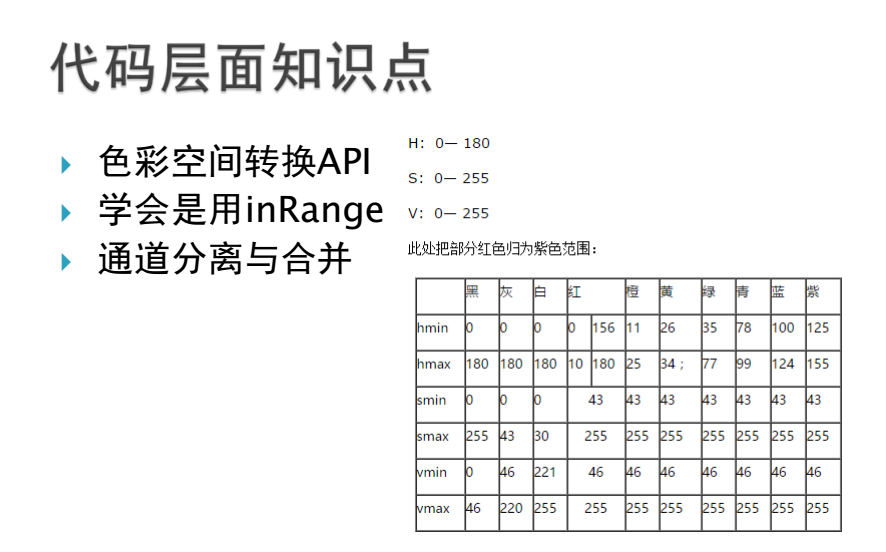

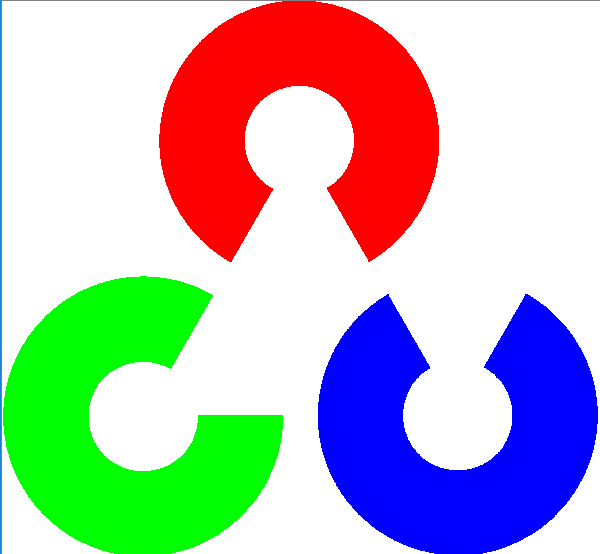


In [24]:
import cv2
import numpy as np
#创建一个（500，500）的numpy数组
img=np.zeros((500,500),dtype='uint8')
#新建一个窗口
cv2.namedWindow('img')
#定义回调函数，参数x为函数cv2.createTrackbar()传递的滑块位置对应的值
def img_intensity_change(x):
    img[:]=[x]
#新建一个滑动条
cv2.createTrackbar('intensity','img',0,255,img_intensity_change)
while(1):
    cv2.imshow('img',img)
    if cv2.waitKey(1)==ord('q'):
        break
cv2.destroyAllWindows()


In [1]:
import tagui as r


r.init()
r.url('file:\\\F:\\swap\\songs\\zljy\\document.xml')

[RPA][ERROR] - URL does not begin with http:// or https:// 


False

In [2]:
r.close()



True